In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

np.c_表示right join
iris['data']裝有所有詳細資料
iris['target']裝有花種

In [16]:
iris=load_iris()
df=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [18]:
X=df.drop(labels=['Species'],axis=1).values
X
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


n_cluster=num  分群數量num
random_state=num 固定亂數num
n_init=num 初始點要嘗試幾次num
因Kmeans會隨初始點有不同結果故需要此參數 預設10
max_iter=num kmeans會產生多次迭代可限制次數

In [20]:
from pandas.core.common import random_state
from sklearn.cluster import KMeans

kmeansModel=KMeans(n_clusters=3 ,random_state=46)
clusters_pred=kmeansModel.fit_predict(X)

In [24]:
kmeansModel.inertia_

78.851441426146

In [25]:
kmeansModel.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


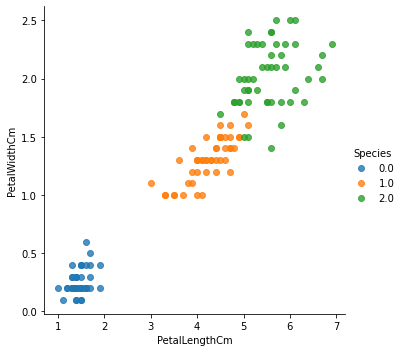

In [28]:
sns.lmplot("PetalLengthCm","PetalWidthCm",hue="Species",data=df,fit_reg=False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


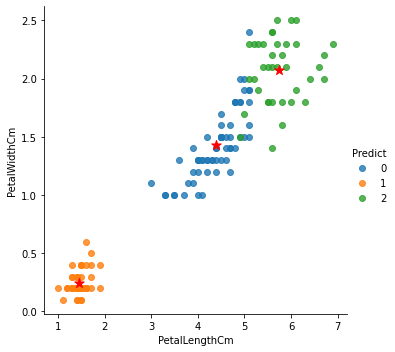

In [34]:
df['Predict']=clusters_pred
sns.lmplot("PetalLengthCm","PetalWidthCm",data=df,hue="Predict",fit_reg=False)
plt.scatter(kmeansModel.cluster_centers_[:,2],kmeansModel.cluster_centers_[:,3],s=100,c='r',marker='*')

inertia_ : MSE

Elbow

In [38]:
kmeans_list=[KMeans(n_clusters=k,random_state=46).fit(X)
        for k in range(1,10)
      ]
inertias=[model.inertia_ for model in kmeans_list]

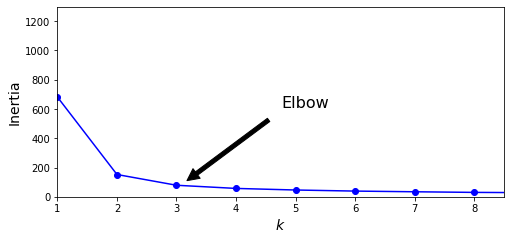

In [40]:
plt.figure(figsize=(8,3.5))
plt.plot(range(1,10),inertias,"bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
      xy=(3,inertias[3]),
      xytext=(0.55,0.55),
      textcoords='figure fraction',
      fontsize=16,
      arrowprops=dict(facecolor="black",shrink=0.1)
      )
plt.axis([1,8.5,0,1300])
plt.show()

silhouette 

In [41]:
from sklearn.metrics import silhouette_score
silhouette_scores=[silhouette_score(X,model.labels_)for model in kmeans_list[1:]]

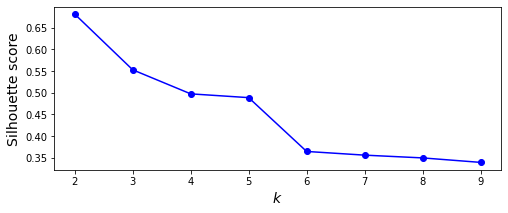

In [43]:
plt.figure(figsize=(8,3))
plt.plot(range(2,10),silhouette_scores,"bo-")
plt.xlabel("$k$",fontsize=14)
plt.ylabel("Silhouette score",fontsize=14)
plt.show()